In [18]:
import pandas as pd
import json
df_channels = pd.read_csv('df_channels_en.tsv', sep='\t')
print(df_channels.head())
print(df_channels.info())




     category_cc   join_date                   channel  \
0         Gaming  2010-04-29  UC-lHJZR3Gqxm24_Vd_AJ5Yw   
1      Education  2006-09-01  UCbCmjCuTUZos6Inko4u57UQ   
2  Entertainment  2006-09-20  UCpEhnqL0y41EpW2TvWAHD7Q   
3  Howto & Style  2016-11-15  UC295-Dw_tDNtZXFeAPAW6Aw   
4         Sports  2007-05-11  UCJ5v_MCY6GNUBTO8-D3XoAg   

                   name_cc  subscribers_cc  videos_cc  subscriber_rank_sb  \
0                PewDiePie       101000000       3956                 3.0   
1  Cocomelon - Nursery ...        60100000        458                 7.0   
2                SET India        56018869      32661                 8.0   
3          5-Minute Crafts        60600000       3591                 9.0   
4                      WWE        48400000      43421                11.0   

   weights  
0    2.087  
1    2.087  
2    2.087  
3    2.087  
4    2.087  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136470 entries, 0 to 136469
Data columns (total 8 columns):


In [19]:

def load_jsonl(file_path):
    data = []
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            data.append(json.loads(line))
    return pd.DataFrame(data)

df_metadata = load_jsonl('filtered_metadata.jsonl')

df_metadata.rename(columns={'channel_id': 'channel'}, inplace=True)

print(df_metadata.head())
print(df_metadata.info())



  categories                   channel                  crawl_date  \
0     Gaming  UCzWm1-4XF7AHxVUTkHCM1uw  2019-11-17 06:28:33.001044   
1     Gaming  UCzWm1-4XF7AHxVUTkHCM1uw  2019-11-17 06:28:33.563584   
2     Gaming  UCzWm1-4XF7AHxVUTkHCM1uw  2019-11-17 06:28:36.350067   
3     Gaming  UCzWm1-4XF7AHxVUTkHCM1uw  2019-11-17 06:28:36.930863   
4     Gaming  UCzWm1-4XF7AHxVUTkHCM1uw  2019-11-17 06:28:39.777410   

  description  dislike_count   display_id  duration  like_count  \
0                        6.0  iWbFNJaaHrw       270        47.0   
1                        8.0  MRaGK43Ux-k       109        52.0   
2                        4.0  -91qrjpgRw0        58        26.0   
3                        8.0  nq9_WZXjjCI        71        25.0   
4                       24.0  Kh-s-TEnqWY      7508        43.0   

                                                tags  \
0  video,games,retrogamer3,ed,findlay,Trump,Ameri...   
1  video,games,retrogamer3,ed,findlay,America's R...   
2  video

In [20]:
# Import time series data
df_timeseries = pd.read_csv('df_timeseries_en.tsv', sep='\t')
print(df_timeseries.head())
print(df_timeseries.info())

                    channel            category             datetime  \
0  UCBJuEqXfXTdcPSbGO9qqn1g  Film and Animation  2017-07-03 00:00:00   
1  UCBJuEqXfXTdcPSbGO9qqn1g  Film and Animation  2017-07-10 00:00:00   
2  UCBJuEqXfXTdcPSbGO9qqn1g  Film and Animation  2017-07-17 00:00:00   
3  UCBJuEqXfXTdcPSbGO9qqn1g  Film and Animation  2017-07-24 00:00:00   
4  UCBJuEqXfXTdcPSbGO9qqn1g  Film and Animation  2017-07-31 00:00:00   

          views    delta_views         subs  delta_subs  videos  delta_videos  \
0  2.024946e+05       0.000000   650.222222    0.000000       5             0   
1  3.940857e+05  191591.111111  1046.000000  395.777778       6             1   
2  8.353938e+05  441308.083333  1501.500000  455.500000       6             0   
3  1.104577e+06  269183.250000  1750.000000  248.500000       6             0   
4  1.284406e+06  179828.600000  2008.300000  258.300000       6             0   

   activity  
0         3  
1         1  
2         1  
3         0  
4         

In [21]:
# Handle missing values
df_channels.dropna(subset=['channel'], inplace=True)
df_metadata.fillna({'description': '', 'tags': '', 'keywords': ''}, inplace=True)
df_timeseries.fillna(0, inplace=True)

# Remove duplicates
df_channels.drop_duplicates(subset=['channel'], inplace=True)
df_metadata.drop_duplicates(subset=['display_id'], inplace=True)
df_timeseries.drop_duplicates(inplace=True)

# Standardize channel ID format
df_channels['channel'] = df_channels['channel'].str.upper()
df_metadata['channel'] = df_metadata['channel'].str.upper()
df_timeseries['channel'] = df_timeseries['channel'].str.upper()

# Merge channel and video data
df_combined = pd.merge(df_metadata, df_channels, left_on='channel', right_on='channel', how='left')

# Check merge results
print(len(df_metadata))
print(len(df_combined))
print(df_combined.head(1))


447616
447616
  categories                   channel                  crawl_date  \
0     Gaming  UCZWM1-4XF7AHXVUTKHCM1UW  2019-11-17 06:28:33.001044   

  description  dislike_count   display_id  duration  like_count  \
0                        6.0  iWbFNJaaHrw       270        47.0   

                                                tags  \
0  video,games,retrogamer3,ed,findlay,Trump,Ameri...   

                                   title          upload_date  view_count  \
0  America's Retribution Term 2 Launched  2019-05-08 00:00:00       445.0   

  keywords category_cc   join_date     name_cc  subscribers_cc  videos_cc  \
0   trump       Gaming  2008-07-18  Ed Findlay           11884        311   

   subscriber_rank_sb  weights  
0            857247.0  14.1935  


In [22]:
# 打印df_combined的键名
print(df_combined.columns)

Index(['categories', 'channel', 'crawl_date', 'description', 'dislike_count',
       'display_id', 'duration', 'like_count', 'tags', 'title', 'upload_date',
       'view_count', 'keywords', 'category_cc', 'join_date', 'name_cc',
       'subscribers_cc', 'videos_cc', 'subscriber_rank_sb', 'weights'],
      dtype='object')


In [23]:
import re

# Conspiracy theory definitions
conspiracy_definitions = {
    "conspiracy_theories": [
        {
            "name": "Deep State",
            "description": "Refers to a hidden powerful faction within the government allegedly working to undermine Trump and his supporters."
        },
        {
            "name": "Election Fraud",
            "description": "Claims of widespread election fraud, especially in the 2020 presidential election, focusing on alleged issues with mail-in ballots."
        },
        {
            "name": "QAnon",
            "description": "While not explicitly endorsed, Trump has shown indirect support for followers of QAnon, a conspiracy about a deep-rooted cabal involved in child trafficking and satanic rituals."
        },
        {
            "name": "Missing Emails",
            "description": "Refers to the 2016 scandal involving Hillary Clinton’s deleted emails, which Trump frequently highlighted."
        },
        {
            "name": "Biden Family Scandal",
            "description": "Claims of corruption within the Biden family, particularly involving Hunter Biden’s business dealings and alleged exploitation of Biden’s influence."
        },
        {
            "name": "Climate Change Hoax",
            "description": "Skepticism toward climate change, suggesting it's a 'hoax' promoted by global elites for profit."
        }
    ]
}

# Create a keyword dictionary based on names and their highly related terms
conspiracy_keywords = {
    "Deep State": ["deepstate", "deep state", "government faction", "shadow government", "hidden government"],
    "Election Fraud": ["election fraud", "vote fraud", "mail-in ballots", "voter suppression", "rigged election"],
    "QAnon": ["qanon", "cabal", "child trafficking", "satanic rituals", "deep-rooted cabal", "Q movement"],
    "Missing Emails": ["missing emails", "deleted emails", "clinton emails", "email scandal", "email leak"],
    "Biden Family Scandal": ["biden family scandal", "hunter biden", "biden corruption", "biden business dealings", "biden influence"],
    "Climate Change Hoax": ["climate change hoax", "global elites", "climate profit", "false climate", "climate deception"]
}

import json
print("\nconspiracy_keywords:")
print(json.dumps(conspiracy_keywords, indent=2, ensure_ascii=False))



conspiracy_keywords:
{
  "Deep State": [
    "deepstate",
    "deep state",
    "government faction",
    "shadow government",
    "hidden government"
  ],
  "Election Fraud": [
    "election fraud",
    "vote fraud",
    "mail-in ballots",
    "voter suppression",
    "rigged election"
  ],
  "QAnon": [
    "qanon",
    "cabal",
    "child trafficking",
    "satanic rituals",
    "deep-rooted cabal",
    "Q movement"
  ],
  "Missing Emails": [
    "missing emails",
    "deleted emails",
    "clinton emails",
    "email scandal",
    "email leak"
  ],
  "Biden Family Scandal": [
    "biden family scandal",
    "hunter biden",
    "biden corruption",
    "biden business dealings",
    "biden influence"
  ],
  "Climate Change Hoax": [
    "climate change hoax",
    "global elites",
    "climate profit",
    "false climate",
    "climate deception"
  ]
}


In [24]:
# Create detection function
def detect_conspiracy_types(row, keywords_dict):
    # Combine relevant text fields
    text = ' '.join([str(row['title']), str(row['description']), str(row['tags'])]).lower()
    detected = {}
    for theory, keywords in keywords_dict.items():
        # Use regular expressions for matching
        pattern = re.compile('|'.join([re.escape(word) for word in keywords]), re.IGNORECASE)
        if pattern.search(text):
            detected[theory] = 1
            continue
        else:
            detected[theory] = 0
    return pd.Series(detected)

# Apply detection function
df_combined = df_combined.fillna({'title': '', 'description': '', 'tags': '', 'keywords': ''})

conspiracy_detection = df_combined.apply(lambda row: detect_conspiracy_types(row, conspiracy_keywords), axis=1)
df_combined_with_conspiracy = pd.concat([df_combined, conspiracy_detection], axis=1)

# Add an overall conspiracy flag
df_combined_with_conspiracy['is_conspiracy'] = df_combined_with_conspiracy[list(conspiracy_keywords.keys())].sum(axis=1).apply(lambda x: 1 if x > 0 else 0)

# View results
print("\nconspiracy_detection:")
print(df_combined_with_conspiracy[['title', 'is_conspiracy'] + list(conspiracy_keywords.keys())].head())

print("\nconspiracy_detection_overall:")
print(df_combined_with_conspiracy['is_conspiracy'].value_counts())



conspiracy_detection:
                                     title  is_conspiracy  Deep State  \
0    America's Retribution Term 2 Launched              0           0   
1      America's Retribution Term 2 promo!              0           0   
2  The last mini boss is done. The fuhrer.              0           0   
3          Elizabeth Warren Boss Finished!              0           0   
4           America's Retribution -Stream-              0           0   

   Election Fraud  QAnon  Missing Emails  Biden Family Scandal  \
0               0      0               0                     0   
1               0      0               0                     0   
2               0      0               0                     0   
3               0      0               0                     0   
4               0      0               0                     0   

   Climate Change Hoax  
0                    0  
1                    0  
2                    0  
3                    0  
4               

In [25]:
# View videos marked as conspiracy
conspiracy_videos = df_combined_with_conspiracy[df_combined_with_conspiracy['is_conspiracy'] == 1]
print("\nExamples of videos marked as conspiracy:")
print(conspiracy_videos[['title', 'is_conspiracy'] + list(conspiracy_keywords.keys())].head())



被标记为阴谋论的视频示例：
                                                 title  is_conspiracy  \
412  Hillary Clinton: Between Two Ferns With Zach G...              1   
416             Putin Loves Trump with Jerry O'Connell              1   
565  Has Donald Trump Betrayed America? | Rocking P...              1   
689     SerialBrain2: Iran and the Bolton Pawn. Part 2              1   
690  SerialBrain2: Iran, Bolton and the Lindsey Rid...              1   

     Deep State  Election Fraud  QAnon  Missing Emails  Biden Family Scandal  \
412           0               0      0               1                     0   
416           0               0      0               1                     0   
565           1               0      0               0                     0   
689           0               0      1               0                     0   
690           0               0      1               0                     0   

     Climate Change Hoax  
412                    0  
416        

In [26]:
# Define the columns to save
columns_to_save = [
    'channel_id',
    'channel',
    'name_cc',
    'category_cc',
    'title',
    'upload_date',
    'view_count',
    'like_count',
    'dislike_count',
    'tags',
    'keywords',
    'is_conspiracy'
] + list(conspiracy_keywords.keys())

# Ensure all selected columns exist in the dataset
columns_to_save = [col for col in columns_to_save if col in conspiracy_videos.columns]

# Create a new DataFrame containing only the selected columns
conspiracy_videos_selected = conspiracy_videos[columns_to_save]

# Preview the selected data
print("\nPreview of selected columns to save:")
print(conspiracy_videos_selected.head())
# Define the path to save the file
output_csv_path = 'conspiracy_videos.csv'

# Save as a CSV file
conspiracy_videos_selected.to_csv(output_csv_path, index=False, encoding='utf-8-sig')

print(f"\nVideos marked as conspiracy have been saved as '{output_csv_path}'")



选择保存的列预览：
                      channel       name_cc      category_cc  \
412  UCZS3-65Y91JHOXFIM7J6GRG  Funny Or Die    Entertainment   
416  UCZS3-65Y91JHOXFIM7J6GRG  Funny Or Die    Entertainment   
565  UCZONXVFWC32YEIWTE_8NF-G    RockingMrE  News & Politics   
689  UCZFSNQ-Q7QV6KBSW9ZCOVXG   And We Know  News & Politics   
690  UCZFSNQ-Q7QV6KBSW9ZCOVXG   And We Know  News & Politics   

                                                 title          upload_date  \
412  Hillary Clinton: Between Two Ferns With Zach G...  2016-09-22 00:00:00   
416             Putin Loves Trump with Jerry O'Connell  2016-07-29 00:00:00   
565  Has Donald Trump Betrayed America? | Rocking P...  2019-03-14 00:00:00   
689     SerialBrain2: Iran and the Bolton Pawn. Part 2  2019-09-29 00:00:00   
690  SerialBrain2: Iran, Bolton and the Lindsey Rid...  2019-09-28 00:00:00   

     view_count  like_count  dislike_count  \
412  21382840.0    256974.0        22808.0   
416     15192.0       341.0          

/var/folders/4k/h5brcvt93r78tm2gt8wvwc840000gp/T/ipykernel_52045/3242478554.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.values, y=type_counts.index, palette='viridis')


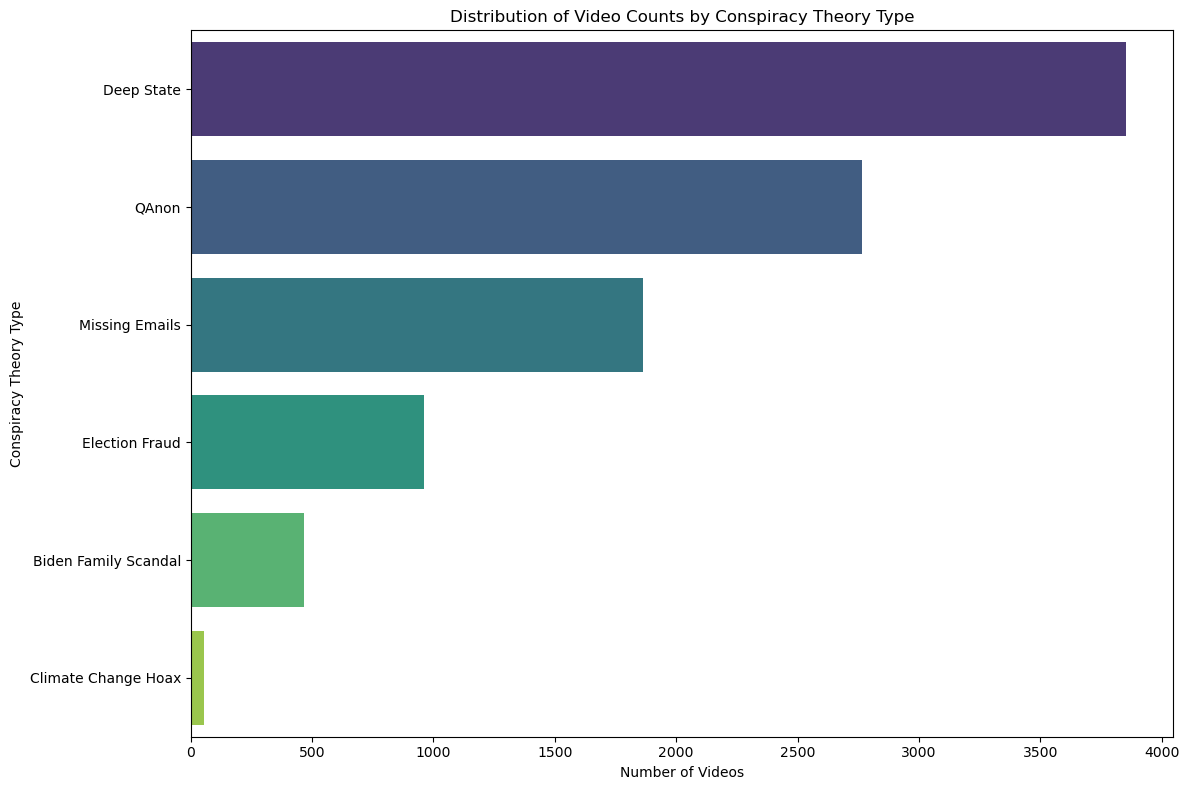

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the number of videos for each type of conspiracy theory
type_counts = df_combined_with_conspiracy[list(conspiracy_keywords.keys())].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=type_counts.values, y=type_counts.index, palette='viridis')
plt.title('Distribution of Video Counts by Conspiracy Theory Type')
plt.xlabel('Number of Videos')
plt.ylabel('Conspiracy Theory Type')
plt.tight_layout()
plt.show()


/var/folders/4k/h5brcvt93r78tm2gt8wvwc840000gp/T/ipykernel_22030/1343633643.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_counts = conspiracy_data.resample('M', on='upload_date').size()


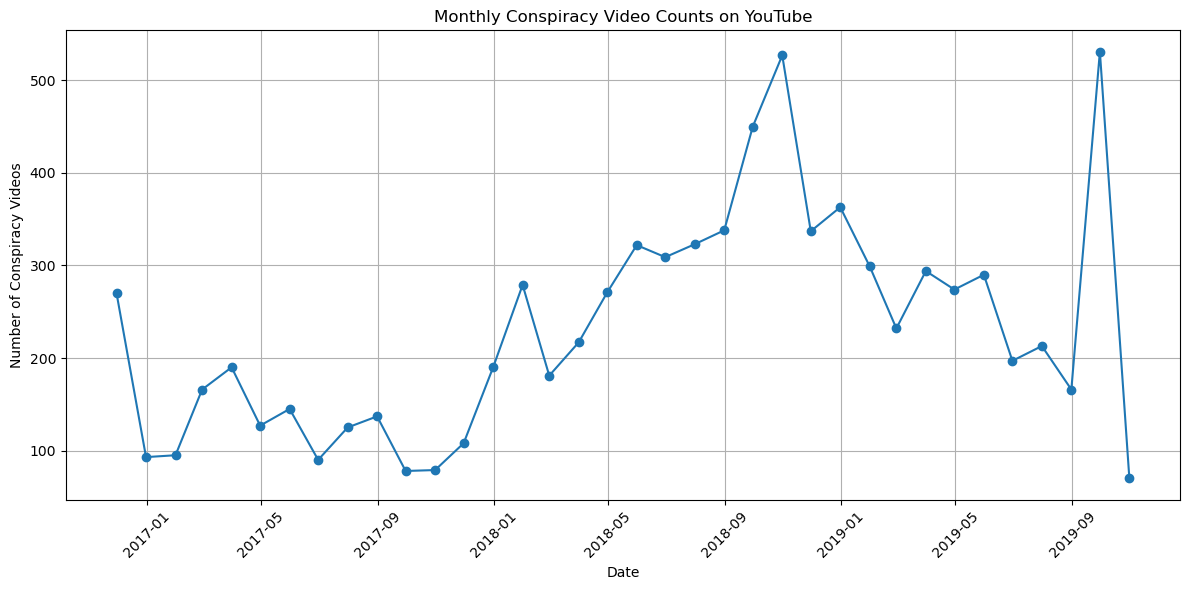

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('conspiracy_videos.csv')

data['upload_date'] = pd.to_datetime(data['upload_date'])
conspiracy_data = data[(data['is_conspiracy'] == 1) & (data['upload_date'] >= '2016-11-01')]

monthly_counts = conspiracy_data.resample('M', on='upload_date').size()

plt.figure(figsize=(12, 6))
plt.plot(monthly_counts.index, monthly_counts.values, marker='o')
plt.title('Monthly Conspiracy Video Counts on YouTube')
plt.xlabel('Date')
plt.ylabel('Number of Conspiracy Videos')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


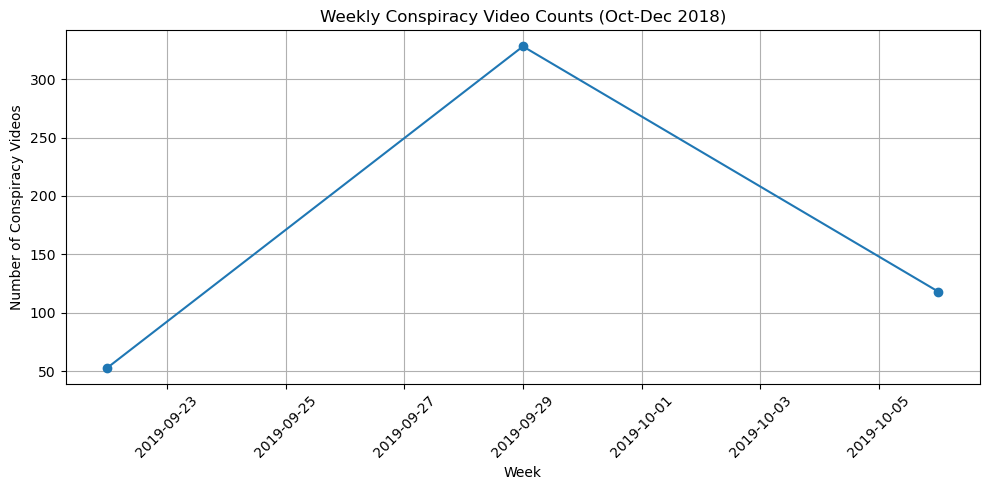

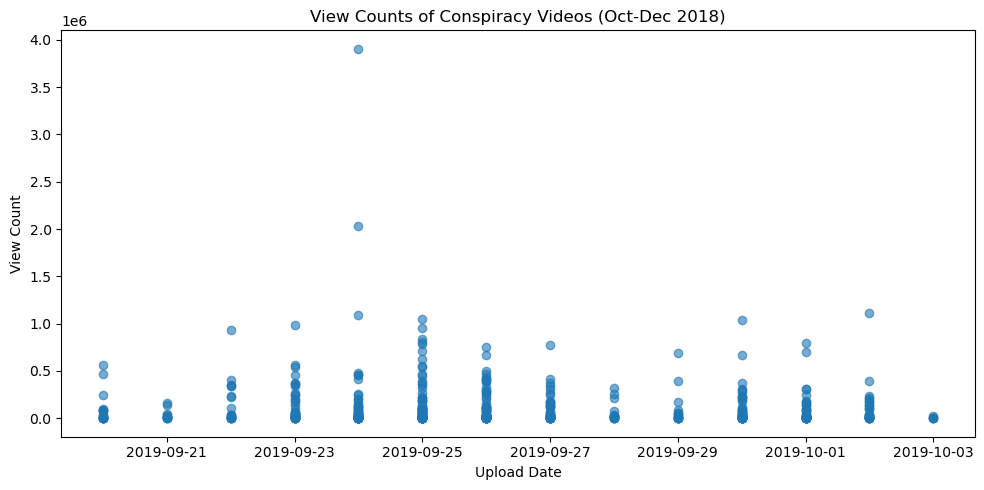

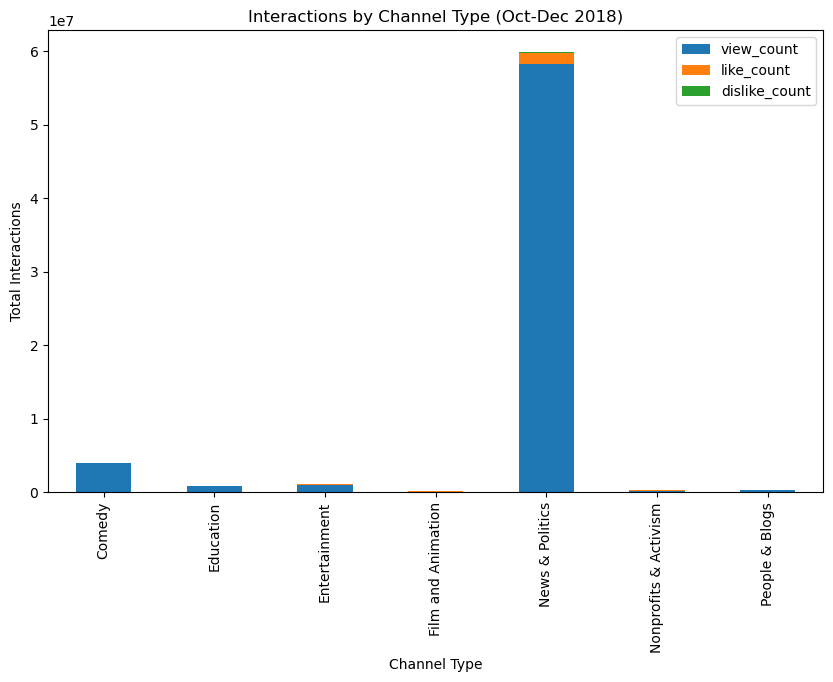

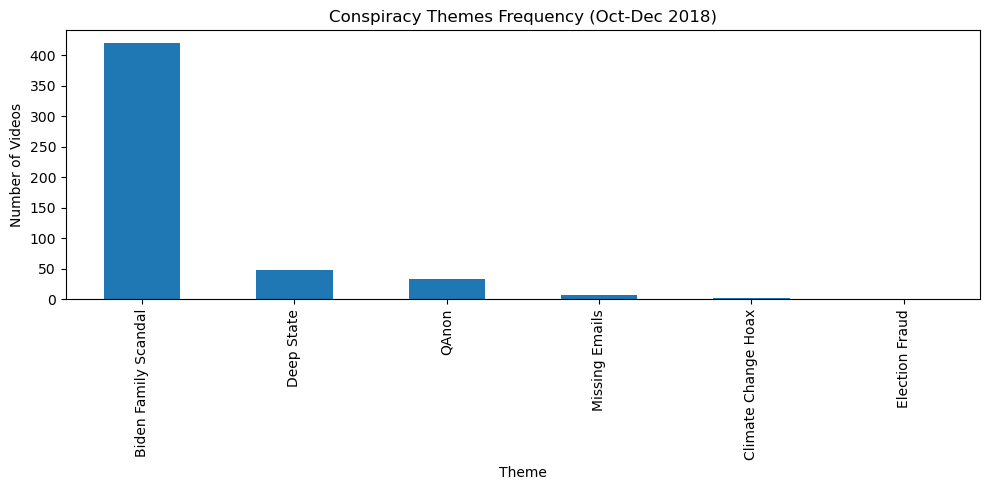

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('conspiracy_videos.csv')
data['upload_date'] = pd.to_datetime(data['upload_date'])

study_period_data = data[(data['is_conspiracy'] == 1) &
                         (data['upload_date'] >= '2019-09-20') &
                         (data['upload_date'] <= '2019-12-10')]


weekly_counts = study_period_data.resample('W', on='upload_date').size()
plt.figure(figsize=(10, 5))
plt.plot(weekly_counts.index, weekly_counts.values, marker='o')
plt.title('Weekly Conspiracy Video Counts (Oct-Dec 2018)')
plt.xlabel('Week')
plt.ylabel('Number of Conspiracy Videos')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(study_period_data['upload_date'], study_period_data['view_count'], alpha=0.6)
plt.title('View Counts of Conspiracy Videos (Oct-Dec 2018)')
plt.xlabel('Upload Date')
plt.ylabel('View Count')
plt.tight_layout()
plt.show()

type_interactions = study_period_data.groupby('category_cc')[['view_count', 'like_count', 'dislike_count']].sum()
type_interactions.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Interactions by Channel Type (Oct-Dec 2018)')
plt.xlabel('Channel Type')
plt.ylabel('Total Interactions')
plt.show()

themes = ['Deep State', 'Election Fraud', 'QAnon', 'Missing Emails', 'Biden Family Scandal', 'Climate Change Hoax']
theme_counts = study_period_data[themes].sum().sort_values(ascending=False)
theme_counts.plot(kind='bar', figsize=(10, 5))
plt.title('Conspiracy Themes Frequency (Oct-Dec 2018)')
plt.xlabel('Theme')
plt.ylabel('Number of Videos')
plt.tight_layout()
plt.show()


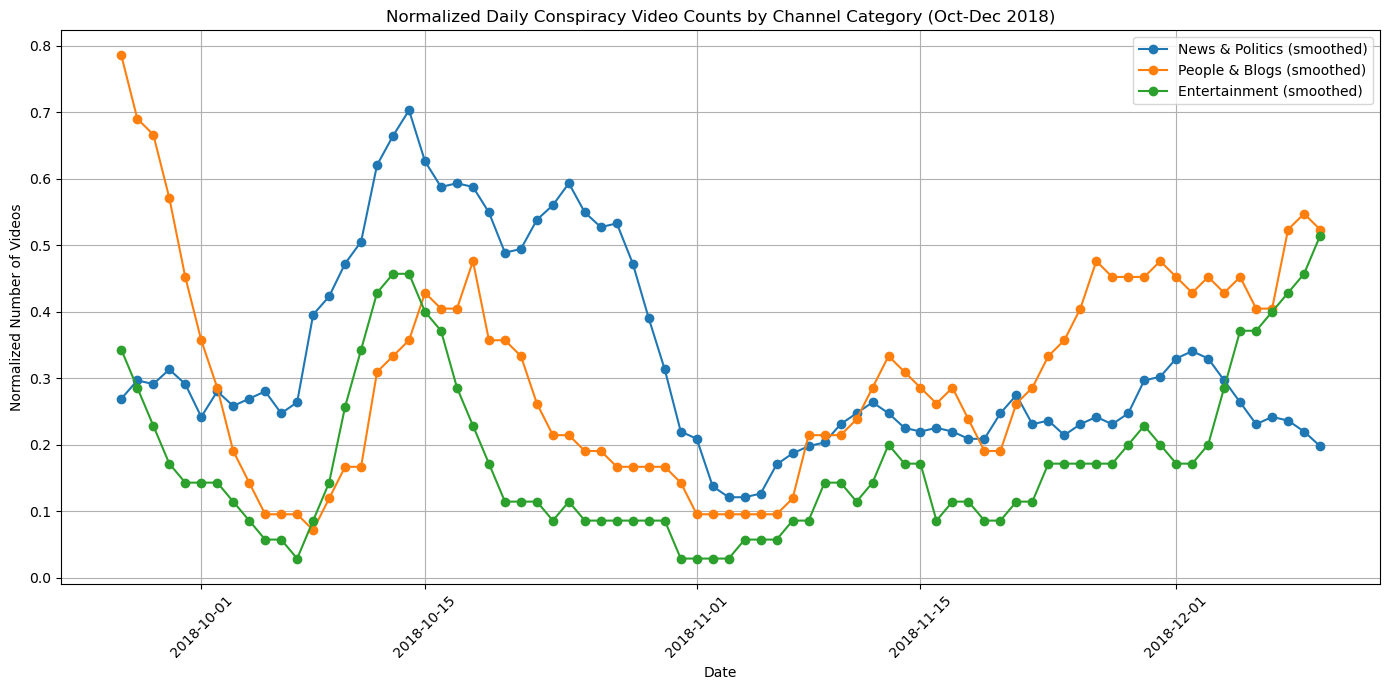

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


data = pd.read_csv('conspiracy_videos.csv')
data['upload_date'] = pd.to_datetime(data['upload_date'])
filtered_data = data[(data['is_conspiracy'] == 1) &
                     (data['upload_date'] >= '2018-9-20') &
                     (data['upload_date'] <= '2018-12-10') &
                     ((data['category_cc'] == 'News & Politics') |
                      (data['category_cc'] == 'People & Blogs') |
                      (data['category_cc'] == 'Entertainment'))]

daily_counts = filtered_data.groupby(['upload_date', 'category_cc']).size().unstack(fill_value=0)
scaler = MinMaxScaler()
normalized_counts = pd.DataFrame(scaler.fit_transform(daily_counts), 
                                 index=daily_counts.index, 
                                 columns=daily_counts.columns)

window = 7
smoothed_counts = normalized_counts.rolling(window=window).mean()

# 绘制时序图
plt.figure(figsize=(14, 7))
for category in ['News & Politics', 'People & Blogs', 'Entertainment']:
    plt.plot(smoothed_counts.index, smoothed_counts[category], marker='o', label=f'{category} (smoothed)')

plt.title('Normalized Daily Conspiracy Video Counts by Channel Category (Oct-Dec 2018)')
plt.xlabel('Date')
plt.ylabel('Normalized Number of Videos')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


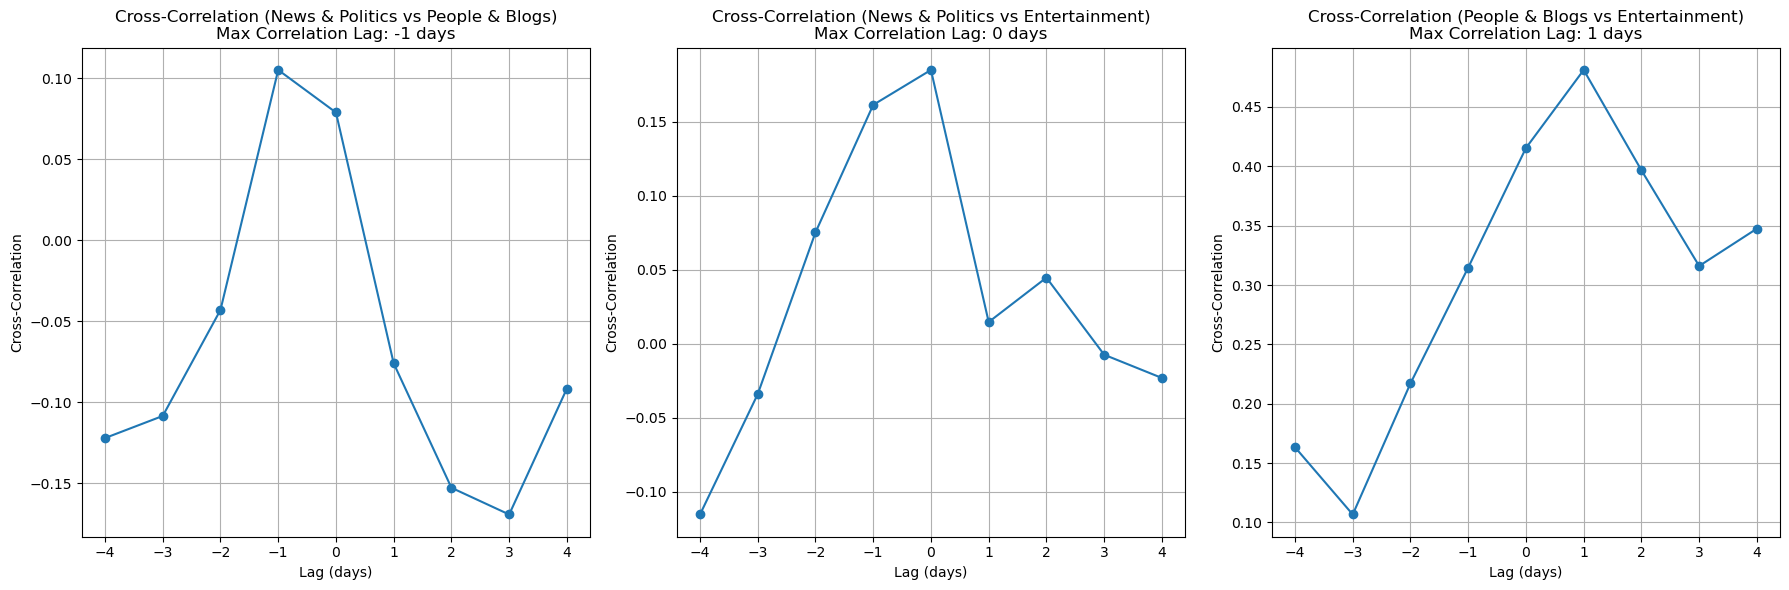

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
data = pd.read_csv('conspiracy_videos.csv')
data['upload_date'] = pd.to_datetime(data['upload_date'])

filtered_data = data[(data['is_conspiracy'] == 1) &
                     (data['upload_date'] >= '2018-09-10') &
                     (data['upload_date'] <= '2018-12-10') &
                     ((data['category_cc'] == 'News & Politics') |
                      (data['category_cc'] == 'People & Blogs') |
                      (data['category_cc'] == 'Entertainment'))]

daily_counts = filtered_data.groupby(['upload_date', 'category_cc']).size().unstack(fill_value=0)


scaler = MinMaxScaler()
normalized_counts = pd.DataFrame(scaler.fit_transform(daily_counts), 
                                 index=daily_counts.index, 
                                 columns=daily_counts.columns)

def cross_correlation(series1, series2, max_lag=4):
    lags = np.arange(-max_lag, max_lag + 1)
    correlations = [series1.corr(series2.shift(lag)) for lag in lags]
    return lags, correlations

lags, correlations_np_pb = cross_correlation(normalized_counts['News & Politics'], normalized_counts['People & Blogs'])
max_lag_np_pb = lags[np.argmax(correlations_np_pb)]

lags, correlations_np_ent = cross_correlation(normalized_counts['News & Politics'], normalized_counts['Entertainment'])
max_lag_np_ent = lags[np.argmax(correlations_np_ent)]

lags, correlations_pb_ent = cross_correlation(normalized_counts['People & Blogs'], normalized_counts['Entertainment'])
max_lag_pb_ent = lags[np.argmax(correlations_pb_ent)]

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.plot(lags, correlations_np_pb, marker='o')
plt.title(f'Cross-Correlation (News & Politics vs People & Blogs)\nMax Correlation Lag: {max_lag_np_pb} days')
plt.xlabel('Lag (days)')
plt.ylabel('Cross-Correlation')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(lags, correlations_np_ent, marker='o')
plt.title(f'Cross-Correlation (News & Politics vs Entertainment)\nMax Correlation Lag: {max_lag_np_ent} days')
plt.xlabel('Lag (days)')
plt.ylabel('Cross-Correlation')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(lags, correlations_pb_ent, marker='o')
plt.title(f'Cross-Correlation (People & Blogs vs Entertainment)\nMax Correlation Lag: {max_lag_pb_ent} days')
plt.xlabel('Lag (days)')
plt.ylabel('Cross-Correlation')
plt.grid(True)

plt.tight_layout()
plt.show()


The images show cross-correlation of normalized video counts, where a positive lag at peak correlation indicates that the first channel type released content earlier, followed by the next type after a delay. This highlights the sequential release pattern across channel categories.

The results indicate that Trump-related conspiracy content first appears in the People & Blogs category, followed by News & Politics, and finally Entertainment. This sequence is understandable, as People & Blogs videos generally require minimal editing or production, reflecting the public's immediate response. For example, someone might record a segment of a Trump interview on their phone and post it online instantly. News & Politics content follows closely behind, as news segments typically involve more preparation and editing, leading to a slightly delayed release. Entertainment videos are posted last, as entertainment creators tend to process information from blogs or news and take additional time to consider how best to adapt the content for maximum engagement, often through added commentary or creative reinterpretation.